In [ ]:
from lightgbm import LGBMClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import probplot
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import re
import seaborn as sns
import tensorflow as tf


In [2]:
path = r'C:\Users\LENOVO\OneDrive\Desktop\Python\Datasets\Depression Dataset\train.csv'

depress_df = pd.read_csv(path)

In [3]:
depress_df

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [4]:
X = depress_df.drop(columns=['Depression', 'id', 'Name'])
Y = depress_df.Depression

In [5]:
X

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No
140698,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No


In [6]:
null_count = X.isnull().sum()/140700 > 0.5
null_count

Gender                                   False
Age                                      False
City                                     False
Working Professional or Student          False
Profession                               False
Academic Pressure                         True
Work Pressure                            False
CGPA                                      True
Study Satisfaction                        True
Job Satisfaction                         False
Sleep Duration                           False
Dietary Habits                           False
Degree                                   False
Have you ever had suicidal thoughts ?    False
Work/Study Hours                         False
Financial Stress                         False
Family History of Mental Illness         False
dtype: bool

In [7]:
for missing, columns in zip(null_count, X.columns):
    if missing:
        X.drop(columns= columns, inplace=True)

In [8]:
people = depress_df.shape[0]

In [9]:
X

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Ahmedabad,Working Professional,NaN,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No
140698,Female,49.0,Srinagar,Working Professional,Plumber,5.0,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No


## EDA and Data Cleaning

In [10]:
working_professionals = depress_df[depress_df['Working Professional or Student'] == 'Working Professional'].shape[0]
students = depress_df[depress_df['Working Professional or Student'] == 'Student'].shape[0]

print(f"Working Professionals: {working_professionals}")
print(f"Students: {students}")

Working Professionals: 112799
Students: 27901


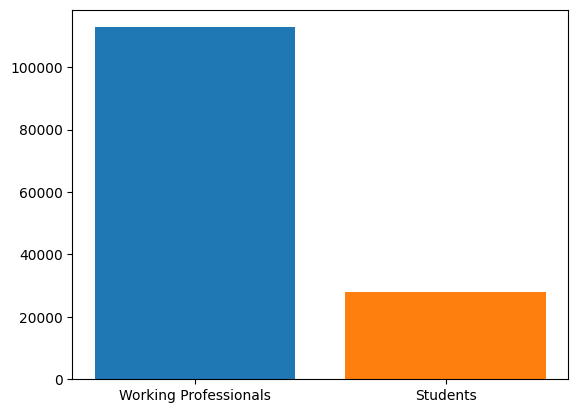

In [12]:
plt.bar(x='Working Professionals', height=working_professionals)
plt.bar(x='Students', height=students);

In [13]:
X.City.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

probably drop the city columns since so much noise

In [14]:
maxAge = X.Age.max()
minAge = X.Age.min()

print(f"The max age is: {maxAge}")
print(f"The min age is: {minAge}")

The max age is: 60.0
The min age is: 18.0


<BarContainer object of 1 artists>

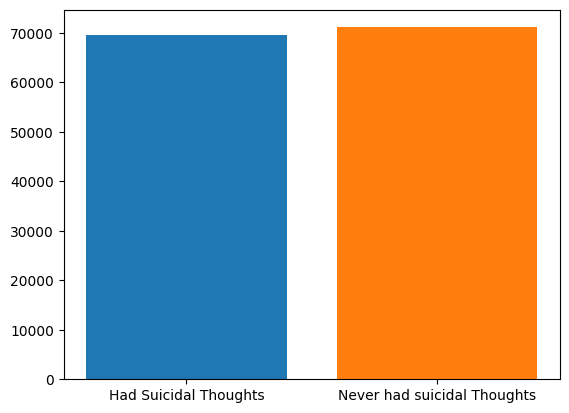

In [15]:
had_suicidal = X[X['Have you ever had suicidal thoughts ?'] == 'Yes'].shape[0]

plt.bar(x='Had Suicidal Thoughts',height=had_suicidal)
plt.bar(x='Never had suicidal Thoughts',height=(people - had_suicidal))

In [16]:
professions = X.Profession.unique()
professions

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

In [17]:
# Professions Column
def func1(df_in):
    if 'Profession' in df_in.columns:
        valid_professions = df_in['Profession'].value_counts()[lambda x: x > 5].index
        df_in['Profession'] = df_in['Profession'].where(df_in['Profession'].isin(valid_professions), None)
    else:
        raise ValueError("Column 'Profession' not found in the DataFrame")

    return df_in

In [18]:
X['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [19]:
def func2(sleep_series):
    #print(type(sleep_series))
    sleep_mapping = {
        'Less than 5 hours': 4.0,
        '1-2 hours': 1.0,
        '2-3 hours': 2.0,
        '3-4 hours': 3.0,
        '4-5 hours': 4.0,
        '5-6 hours': 5.0,
        '6-7 hours': 6.0,
        '7-8 hours': 7.0,
        '8-9 hours': 8.0,
        '9-11 hours': 9.0,
        '10-11 hours': 10.0,
        'More than 8 hours': 10.0,
        'Moderate': 5.0,
        'Unhealthy': 2.0
    }
    if isinstance(sleep_series, pd.DataFrame):
        sleep_series['Sleep Duration'] = sleep_series['Sleep Duration'].map(sleep_mapping)
        return sleep_series
    else:
        raise TypeError("Input must be a pandas Series")

In [20]:
# City Cloumn
def func3(df_in):
    if 'City' in df_in.columns:
        valid_cities = df_in['City'].value_counts()[lambda x: x > 10].index
        df_in['City'] = df_in['City'].where(df_in['City'].isin(valid_cities), None)
        return df_in
    else:
        raise ValueError("Column 'City' not found in the DataFrame")

In [21]:
def func4(df_in):
    if 'Working Professional or Student' in df_in.columns and 'Job Satisfaction' in df_in.columns:
        df_in.loc[df_in['Working Professional or Student'] == 'Student', 'Job Satisfaction'] = 0.0
    else:
        raise ValueError("Required columns not found in the DataFrame")

    return df_in

In [22]:
degrees = X.Degree.unique()

In [ ]:
def func5(df):
    degrees = np.array([
        'bhm', 'llb', 'bpharm', 'bba', 'mca', 'md', 'bsc', 'me', 'barch',
        'bca', 'be', 'ma', 'bed', 'bcom', 'mba', 'mcom', 'mhm', 'ba',
        'mtech', 'phd', 'med', 'msc', 'btech', 'llm', 'mbbs', 'mpharm',
        'march', 'bpa', 'mtech', 'class12'
    ])
    
    def clean_and_validate(value):
        if isinstance(value, str):
            normalized_value = re.sub(r'[^A-Za-z0-9]', '', value).lower()
            if normalized_value in degrees:
                return value  
        return np.nan
    
    if isinstance(df, pd.DataFrame):
        df['Degree'] = df['Degree'].map(clean_and_validate)
        return df
    else:
        raise TypeError("Input must be a pandas Series")

In [25]:
X['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [ ]:

def func6(df_in):
    diet_map = {
        'Healthy': 'Healthy',
        'Unhealthy': 'Unhealthy',
        'Less than Healthy': 'Unhealthy',
        'More Healthy': 'Healthy',
        'No Healthy': 'Unhealthy',
        'Moderate': 'Moderate',
        'Less Healthy': 'Moderate'
    }
        
    if 'Dietary Habits' in df_in.columns:
        df_in['Dietary Habits'] = df_in['Dietary Habits'].map(diet_map)
    else:
        raise ValueError("Column 'Dietary Habits' not found in the DataFrame")
    
    return df_in

## Feature Engineering

In [ ]:
def feature_engineering(df : pd.DataFrame):
    df_new = df.copy()

    df_new['Work-Life Balance Score'] = (10 - df_new['Work Pressure']) + df_new['Job Satisfaction'] - (df_new['Work/Study Hours'] / 2)

    df_new['Overwork Indicator'] = df_new['Work/Study Hours'].apply(lambda x: "Overworked" if x > 8 else "Balanced")

    dietary_map = {'Healthy': 3, 'Moderate': 2, 'Unhealthy': 1}
    df_new['Dietary Score'] = df_new['Dietary Habits'].map(dietary_map)

    def calculate_health_risk(row):
        if 0 <= row['Sleep Duration'] < 3:
            sleep_score = 1
        elif 3 <= row['Sleep Duration'] < 5:
            sleep_score = 2
        elif 5 <= row['Sleep Duration'] < 7:
            sleep_score = 3
        elif 7 <= row['Sleep Duration'] < 9:
            sleep_score = 4
        else:
            sleep_score = 2  
        return sleep_score + row['Dietary Score']

    df_new['Physical Health Risk'] = df_new.apply(calculate_health_risk, axis=1)


    df_new['Mental Health Risk'] = (df_new['Family History of Mental Illness'].map({'Yes': 1, 'No': 0}) +
                                    (df_new['Financial Stress'] > 3).astype(int))

    def risk_category(row):
        if row['Financial Stress'] > 3 and row['Sleep Duration'] < 5 and row['Job Satisfaction'] <= 2:
            return 'High Risk'
        elif 2 <= row['Financial Stress'] <= 3 and 5 <= row['Sleep Duration'] < 7 and row['Job Satisfaction'] == 3:
            return 'Moderate Risk'
        elif row['Financial Stress'] <= 2 and row['Sleep Duration'] >= 7 and row['Job Satisfaction'] > 3:
            return 'Low Risk'
        return 'Uncertain'

    df_new['Risk Category'] = df_new.apply(risk_category, axis=1)

    return df_new

In [29]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Work Pressure                          112782 non-null  float64
 6   Job Satisfaction                       112790 non-null  float64
 7   Sleep Duration                         140700 non-null  object 
 8   Dietary Habits                         140696 non-null  object 
 9   Degree                                 140698 non-null  object 
 10  Have you ever had suicidal thoughts ?  140700 non-null  

In [31]:
functiontransformer1 = FunctionTransformer(func1)
functiontransformer2 = FunctionTransformer(func2)
functiontransformer3 = FunctionTransformer(func3)
functiontransformer4 = FunctionTransformer(func4)
functiontransformer5 = FunctionTransformer(func5)
functiontransformer6 = FunctionTransformer(func6)
featuretransformer = FunctionTransformer(feature_engineering)

In [ ]:
set_config(display='diagram')

In [33]:
def func7(nparray):
    nparray = pd.DataFrame(nparray, columns= X.columns)
    return nparray

In [34]:
categorical_columns = X.select_dtypes(include=['object','category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.append(pd.Index(['Sleep Duration']))

categorical_columns.drop('Sleep Duration')

categorical_columns_featured = categorical_columns.append(pd.Index(['Risk Category', 'Overwork Indicator']))
numerical_columns_featured = numerical_columns.append(pd.Index(['Work-Life Balance Score', 'Dietary Score', 'Physical Health Risk', 'Mental Health Risk']))


preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('categorical', categorical_transformer, categorical_columns)
], remainder='passthrough', sparse_threshold=0)

preprocessorfeatured = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_columns_featured),
    ('categorical', categorical_transformer, categorical_columns_featured)
], remainder='passthrough', sparse_threshold=0)

columntransformer = ColumnTransformer(
    transformers=[
    ('city', FunctionTransformer(func3), [2]),
    ('profession', FunctionTransformer(func1), [4]),
    ('student', FunctionTransformer(func4), [3, 6]),
    ('sleep', FunctionTransformer(func2), [7]),
    ('diet', FunctionTransformer(func6), [8]),
    ('degree', FunctionTransformer(func5), [9])    
], remainder='passthrough', sparse_threshold=0, verbose_feature_names_out=False)

In [35]:
for i in range(len(X.columns)):
    print(f"{i} : {X.columns[i]}")

0 : Gender
1 : Age
2 : City
3 : Working Professional or Student
4 : Profession
5 : Work Pressure
6 : Job Satisfaction
7 : Sleep Duration
8 : Dietary Habits
9 : Degree
10 : Have you ever had suicidal thoughts ?
11 : Work/Study Hours
12 : Financial Stress
13 : Family History of Mental Illness


In [36]:
print(categorical_columns)
print(numerical_columns)

Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')
Index(['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Sleep Duration'],
      dtype='object')


In [ ]:
def reorder_columns(X, original_columns):
    return pd.DataFrame(X, columns=original_columns)

original_columns = [
    'Gender', 'Age', 'City', 'Working Professional or Student', 'Profession',
    'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
    'Financial Stress', 'Family History of Mental Illness'
]

In [38]:
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

pipelinefeatured = Pipeline([
    ('fe', featuretransformer), 
    ('preprocessor', preprocessorfeatured)
])

DataCleaningPipeline = Pipeline([
    ('transform_columns', columntransformer),
]).set_output(transform='pandas')

In [39]:
X_cleaned = DataCleaningPipeline.fit_transform(X)

In [40]:
pd.DataFrame(X_cleaned).Profession.unique()

array(['Chef', 'Teacher', None, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker', 'Student'],
      dtype=object)

In [41]:
X.head(1)

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No


In [ ]:
df_transformed = func1(X[['Profession']])
print(df_transformed.shape)

In [43]:
x = preprocessor.fit_transform(X_cleaned)

In [44]:
x.shape

(140700, 133)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, Y, test_size=0.2, random_state=42)

In [46]:
X_train.shape

(112560, 133)

In [ ]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
val_predictions = logistic.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)

accuracy

0.9285714285714286

In [49]:
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22986
           1       0.82      0.79      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140



In [ ]:
cross_val_score(logistic, X_train, y_train, cv= 10, scoring='accuracy').mean()

0.9308901918976545

In [51]:
test_path = r'C:\Users\LENOVO\OneDrive\Desktop\Python\Datasets\Depression Dataset\test.csv'

test_df = pd.read_csv(test_path)

In [52]:
test_df.drop(columns=['id', 'Name', 'CGPA', 'Study Satisfaction', 'Academic Pressure'], inplace=True)

In [53]:
test_cleaned = DataCleaningPipeline.transform(test_df)

In [54]:
test_cleaned

,City,Profession,Working Professional or Student,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Gender,Age,Work Pressure,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Visakhapatnam,Judge,Working Professional,5.0,4.0,Moderate,LLB,Male,53.0,2.0,No,9.0,3.0,Yes
1,Kolkata,Educational Consultant,Working Professional,4.0,4.0,Moderate,B.Ed,Female,58.0,2.0,No,6.0,4.0,No
2,Jaipur,Teacher,Working Professional,1.0,7.0,Moderate,B.Arch,Male,53.0,4.0,Yes,12.0,4.0,No
3,Rajkot,None,Student,0.0,10.0,Moderate,BSc,Female,23.0,NaN,Yes,10.0,4.0,No
4,Kalyan,Teacher,Working Professional,5.0,7.0,Moderate,BCA,Male,47.0,5.0,Yes,3.0,4.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,Jaipur,Pilot,Working Professional,5.0,4.0,Moderate,BSc,Female,49.0,3.0,Yes,2.0,2.0,Yes
93796,Ahmedabad,Pilot,Working Professional,1.0,7.0,Moderate,BE,Male,29.0,5.0,Yes,11.0,3.0,Yes
93797,Visakhapatnam,None,Student,0.0,7.0,Moderate,B.Tech,Male,24.0,NaN,No,7.0,1.0,No
93798,Kalyan,Marketing Manager,Working Professional,2.0,5.0,Healthy,BA,Female,23.0,4.0,Yes,7.0,5.0,Yes


In [55]:
testData = preprocessor.transform(test_cleaned)

In [56]:
testData.shape

(93800, 133)

In [57]:
predictions_LR = logistic.predict(testData)

In [58]:
idextractor = pd.read_csv(test_path)
submission_LR = idextractor[['id']].copy()

submission_LR['Depression'] = predictions_LR
submission_LR.to_csv('SubmissionLR.csv', index=False)

In [59]:
X_cleaned

,City,Profession,Working Professional or Student,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Gender,Age,Work Pressure,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Ludhiana,Chef,Working Professional,2.0,10.0,Healthy,BHM,Female,49.0,5.0,No,1.0,2.0,No
1,Varanasi,Teacher,Working Professional,3.0,4.0,Unhealthy,LLB,Male,26.0,4.0,Yes,7.0,3.0,No
2,Visakhapatnam,None,Student,0.0,5.0,Healthy,B.Pharm,Male,33.0,NaN,Yes,3.0,1.0,No
3,Mumbai,Teacher,Working Professional,1.0,4.0,Moderate,BBA,Male,22.0,5.0,Yes,10.0,1.0,Yes
4,Kanpur,Business Analyst,Working Professional,1.0,5.0,Unhealthy,BBA,Female,30.0,1.0,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Ahmedabad,None,Working Professional,4.0,5.0,Unhealthy,Class 12,Female,18.0,5.0,No,2.0,4.0,Yes
140696,Hyderabad,Content Writer,Working Professional,4.0,7.0,Moderate,B.Tech,Female,41.0,5.0,Yes,6.0,5.0,Yes
140697,Kolkata,Marketing Manager,Working Professional,1.0,10.0,Moderate,B.Com,Female,24.0,3.0,No,4.0,4.0,No
140698,Srinagar,Plumber,Working Professional,2.0,5.0,Moderate,ME,Female,49.0,5.0,Yes,10.0,1.0,No


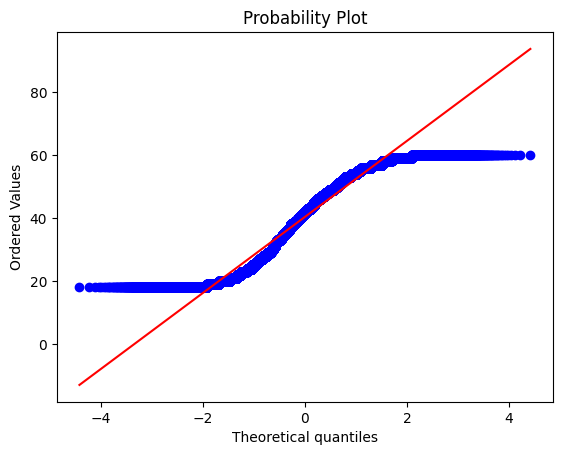

In [61]:
probplot(X_cleaned['Age'], dist='norm', plot=plt)
plt.show()


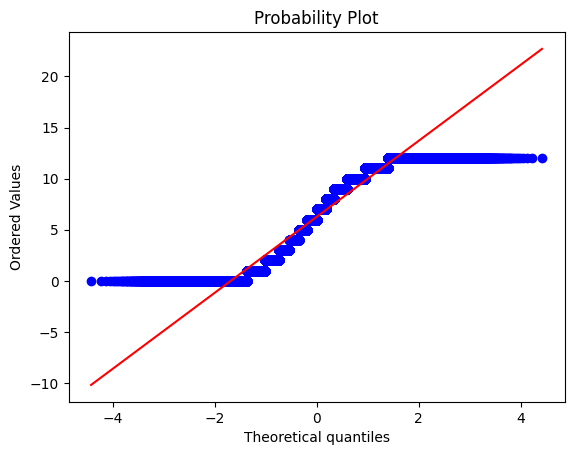

In [63]:
probplot(X_cleaned['Work/Study Hours'], dist='norm', plot=plt);

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(100, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(50, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(12, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(12, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'precision', 'recall'])

In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
def buildModel(optimizer='adam'):
    classifier = tf.keras.Sequential()
    
    classifier.add(tf.keras.layers.Dense(72, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)))
    classifier.add(tf.keras.layers.Dropout(0.3))
    classifier.add(tf.keras.layers.Dense(36, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)))
    classifier.add(tf.keras.layers.Dense(18, activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.01)))
    classifier.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    classifier.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
    
    return classifier

In [70]:
X_train.shape

(112560, 133)

In [71]:
y_train.shape

(112560,)

In [ ]:
model.fit(X_train, 
          y_train,
          validation_data=(X_val, y_val), 
          epochs=100,
          batch_size=32)

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic',tree_method='gpu_hist', random_state=42)

# Define the parameters grid
param_grid = {
    'max_depth': [3, 6, 10, 15, 30],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200, 500]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10, 15, 30],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
val_predictions_XGB = best_model.predict(X_val)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [ ]:
accuracy_score(y_val, val_predictions_XGB)

0.9305970149253732

In [ ]:
predictions_XGB = best_model.predict(testData)

In [ ]:
submission_XGB = idextractor[['id']].copy()

submission_XGB['Depression'] = predictions_XGB
submission_XGB.to_csv('SubmissionXGB.csv', index=False)

In [ ]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=4,
    scoring='accuracy',
    verbose=3
    )

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.925 total time=   4.2s
[CV 2/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.926 total time=   3.9s
[CV 3/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.930 total time=   3.9s
[CV 4/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.925 total time=   3.8s
[CV 1/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   7.7s
[CV 2/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.926 total time=   7.7s
[CV 3/4] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.930 total tim

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
val_predictions_RF = best_model.predict(X_val)

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
accuracy_score(y_val, val_predictions_RF)

0.9285358919687278

In [ ]:
predictions_RF = best_model.predict(testData)
submission_RF = idextractor[['id']].copy()

submission_RF['Depression'] = predictions_RF
submission_RF.to_csv('SubmissionRF.csv', index=False)

## Training on Feature Engineered Data

In [74]:
xFeatured = pipelinefeatured.fit_transform(X_cleaned)

In [75]:
testDataFeatured = pipelinefeatured.transform(test_cleaned)

In [76]:
xFeatured.shape

(140700, 143)

In [77]:
X_trainFeatured, X_valFeatured, y_trainFeatured, y_valFeatured = train_test_split(xFeatured, Y, test_size=0.3, random_state=42)

In [78]:
print(X_trainFeatured.shape, y_trainFeatured.shape)

(98490, 143) (98490,)


In [79]:
logistic.fit(X_trainFeatured, y_trainFeatured)

val_predictionsFeatured = logistic.predict(X_valFeatured)

accuracy = accuracy_score(y_valFeatured, val_predictionsFeatured)

accuracy

0.9286661928452973

In [80]:
cross_val_score(logistic, X_trainFeatured, y_trainFeatured, cv=10, scoring='accuracy').mean()

0.9312011371712865

In [ ]:
predictions_LRFeatured = logistic.predict(testDataFeatured)

submission_LRFeatured = idextractor[['id']].copy()

submission_LRFeatured['Depression'] = predictions_LRFeatured
submission_LRFeatured.to_csv('SubmissionLRFeatured.csv', index=False)

In [ ]:
history = model.fit(X_trainFeatured, 
          y_trainFeatured,
          validation_data=(X_valFeatured, y_valFeatured), 
          epochs=75,
          batch_size=32)

Epoch 1/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9065 - loss: 0.5837 - precision: 0.7920 - recall: 0.6527 - val_accuracy: 0.9246 - val_loss: 0.2357 - val_precision: 0.7622 - val_recall: 0.8583
Epoch 2/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9237 - loss: 0.2473 - precision: 0.7879 - recall: 0.7853 - val_accuracy: 0.9282 - val_loss: 0.2285 - val_precision: 0.7964 - val_recall: 0.8201
Epoch 3/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9237 - loss: 0.2407 - precision: 0.7902 - recall: 0.7937 - val_accuracy: 0.9275 - val_loss: 0.2221 - val_precision: 0.8044 - val_recall: 0.8009
Epoch 4/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9241 - loss: 0.2378 - precision: 0.7885 - recall: 0.7909 - val_accuracy: 0.9278 - val_loss: 0.2180 - val_precision: 0.8168 - val_recall: 0.7838
Epoch 5/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9241 - loss: 0.2373 - precision: 0.7931 - recall: 0.7892 - val_accuracy: 0.9275 - va

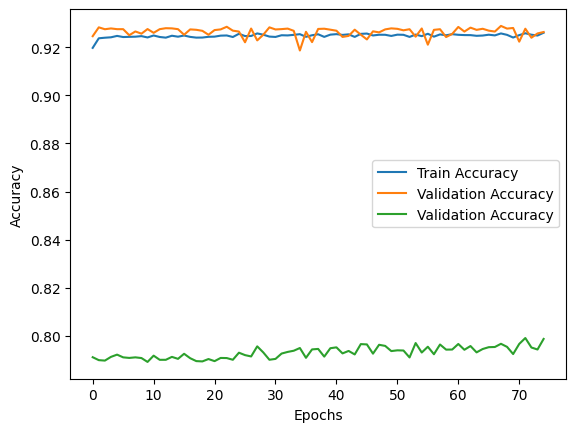

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

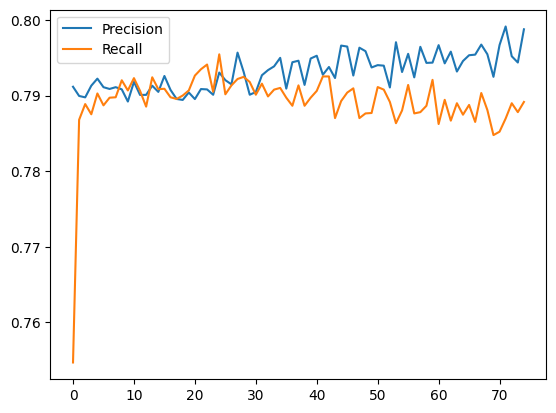

In [ ]:
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['recall'], label='Recall')
plt.legend()

In [ ]:
predictions_NN1 = model.predict(testDataFeatured)

predictions_NN1 = (predictions_NN1 > 0.5).astype(int)

submission_NN1 = idextractor[['id']].copy()

submission_NN1['Depression'] = predictions_NN1
submission_NN1.to_csv('SubmissionNN1.csv', index=False)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 3s 891us/step


In [ ]:
history = model.fit(X_trainFeatured, 
          y_trainFeatured,
          validation_data=(X_valFeatured, y_valFeatured), 
          epochs=75,
          batch_size=32,
          callbacks=[lr_callback],
          verbose=1)

Epoch 1/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8826 - loss: 0.6906 - precision: 0.7230 - recall: 0.5119 - val_accuracy: 0.9267 - val_loss: 0.2626 - val_precision: 0.8103 - val_recall: 0.7859 - learning_rate: 0.0010
Epoch 2/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9233 - loss: 0.2830 - precision: 0.7772 - recall: 0.8054 - val_accuracy: 0.9278 - val_loss: 0.2505 - val_precision: 0.7943 - val_recall: 0.8205 - learning_rate: 0.0010
Epoch 3/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9230 - loss: 0.2744 - precision: 0.7732 - recall: 0.8131 - val_accuracy: 0.9271 - val_loss: 0.2451 - val_precision: 0.8279 - val_recall: 0.7627 - learning_rate: 0.0010
Epoch 4/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9231 - loss: 0.2688 - precision: 0.7754 - recall: 0.8110 - val_accuracy: 0.9275 - val_loss: 0.2432 - val_precision: 0.8280 - val_recall: 0.7654 - learning_rate: 0.0010
Epoch 5/75
3078/3078 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - 

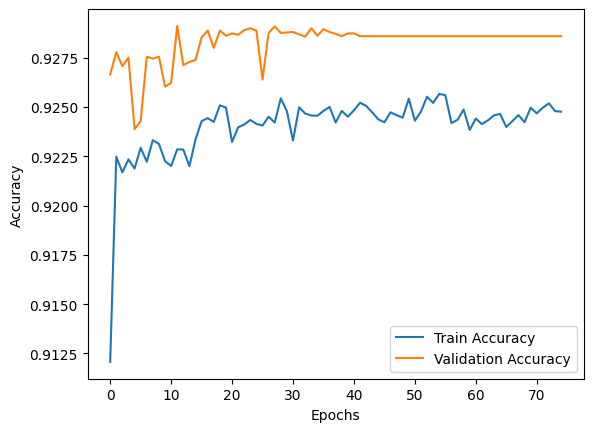

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic',tree_method="hist", device="cuda", random_state=42)

# Define the parameters grid
param_grid = {
    "max_depth": [3, 5, 7],                 # Depth of the trees
    "learning_rate": [0.1, 0.2],            # Step size (eta)
    "subsample": [0.8, 1.0],                # Fraction of rows to use per tree
    "colsample_bytree": [0.8, 1.0],         # Fraction of columns to use per tree
    "n_estimators": [100, 200],             # Total number of boosting rounds
    "num_parallel_tree": [1, 5, 10]         # Number of trees per boosting round
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_trainFeatured, y_trainFeatured)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200],
                         'num_parallel_tree': [1, 5, 10],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
val_predictions_XGBFeatured = best_model.predict(X_valFeatured)

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'num_parallel_tree': 10, 'subsample': 0.8}


In [ ]:
accuracy_score(y_valFeatured, val_predictions_XGBFeatured)

0.9300165837479271

In [ ]:
predictions_XGBFeatured2 = best_model.predict(testDataFeatured)
submission_XGBFeatured2 = idextractor[['id']].copy()

submission_XGBFeatured2['Depression'] = predictions_XGBFeatured2
submission_XGBFeatured2.to_csv('SubmissionXGBFeatured2.csv', index=False)

In [81]:
X_cleaned

,City,Profession,Working Professional or Student,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Gender,Age,Work Pressure,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Ludhiana,Chef,Working Professional,2.0,10.0,Healthy,BHM,Female,49.0,5.0,No,1.0,2.0,No
1,Varanasi,Teacher,Working Professional,3.0,4.0,Unhealthy,LLB,Male,26.0,4.0,Yes,7.0,3.0,No
2,Visakhapatnam,None,Student,0.0,5.0,Healthy,B.Pharm,Male,33.0,NaN,Yes,3.0,1.0,No
3,Mumbai,Teacher,Working Professional,1.0,4.0,Moderate,BBA,Male,22.0,5.0,Yes,10.0,1.0,Yes
4,Kanpur,Business Analyst,Working Professional,1.0,5.0,Unhealthy,BBA,Female,30.0,1.0,Yes,9.0,4.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Ahmedabad,None,Working Professional,4.0,5.0,Unhealthy,Class 12,Female,18.0,5.0,No,2.0,4.0,Yes
140696,Hyderabad,Content Writer,Working Professional,4.0,7.0,Moderate,B.Tech,Female,41.0,5.0,Yes,6.0,5.0,Yes
140697,Kolkata,Marketing Manager,Working Professional,1.0,10.0,Moderate,B.Com,Female,24.0,3.0,No,4.0,4.0,No
140698,Srinagar,Plumber,Working Professional,2.0,5.0,Moderate,ME,Female,49.0,5.0,Yes,10.0,1.0,No


In [82]:
X_cleaned[X_cleaned.Profession.isnull()]

,City,Profession,Working Professional or Student,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Gender,Age,Work Pressure,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
2,Visakhapatnam,None,Student,0.0,5.0,Healthy,B.Pharm,Male,33.0,NaN,Yes,3.0,1.0,No
8,Bangalore,None,Student,0.0,5.0,Moderate,BSc,Female,24.0,NaN,No,3.0,2.0,Yes
26,Srinagar,None,Student,0.0,4.0,Healthy,BA,Male,31.0,NaN,No,9.0,1.0,Yes
29,Agra,None,Working Professional,5.0,10.0,Healthy,Class 12,Female,19.0,1.0,No,5.0,2.0,No
30,Varanasi,None,Student,0.0,7.0,Moderate,BCA,Female,28.0,NaN,Yes,4.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140686,Ludhiana,None,Student,0.0,4.0,Healthy,MSc,Male,27.0,NaN,No,0.0,3.0,Yes
140689,Faridabad,None,Student,0.0,5.0,Unhealthy,MD,Male,31.0,NaN,No,12.0,2.0,No
140690,Ludhiana,None,Student,0.0,4.0,Healthy,Class 12,Female,18.0,NaN,Yes,10.0,5.0,No
140695,Ahmedabad,None,Working Professional,4.0,5.0,Unhealthy,Class 12,Female,18.0,5.0,No,2.0,4.0,Yes


In [83]:
X_cleaned.Degree.unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', nan, 'BEd', 'B.Sc', 'BPharm', 'M.Arch',
       'MPharm', 'BArch', 'MTech', 'BPA', 'MEd', 'B BA', 'M_Tech'],
      dtype=object)

In [84]:
X_cleaned.Profession.unique()

array(['Chef', 'Teacher', None, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker', 'Student'],
      dtype=object)

In [85]:
def professioncorrected(df):
    degreeToProfession = {
        'BHM': 'Chef',
        'LLB': 'Lawyer',
        'B.Pharm': 'Pharmacist',
        'BBA': 'Business Analyst',
        'MCA': 'Software Engineer',
        'MD': 'Doctor',
        'BSc': 'Researcher',
        'ME': 'Mechanical Engineer',
        'B.Arch': 'Architect',
        'BCA': 'Data Scientist',
        'BE': 'Civil Engineer',
        'MA': 'Teacher',
        'B.Ed': 'Educational Consultant',
        'B.Com': 'Accountant',
        'MBA': 'Marketing Manager',
        'M.Com': 'Financial Analyst',
        'MHM': 'Travel Consultant',
        'BA': 'Content Writer',
        'Class 12': 'Student',
        'M.Tech': 'Research Analyst',
        'PhD': 'Judge',
        'M.Ed': 'HR Manager',
        'MSc': 'Researcher',
        'B.Tech': 'Mechanical Engineer',
        'LLM': 'Lawyer',
        'MBBS': 'Doctor',
        'M.Pharm': 'Chemist',
        None: None,
        'BEd': 'Teacher',
        'B.Sc': 'Graphic Designer',
        'BPharm': 'Pharmacist',
        'M.Arch': 'Architect',
        'MPharm': 'Pharmacist',
        'BArch': 'Architect',
        'MTech': 'Software Engineer',
        'BPA': 'UX/UI Designer',
        'MEd': 'Educational Consultant',
        'B BA': 'Business Analyst',
        'M_Tech': 'Digital Marketer'
    }

    df['Profession'] = df.apply(
    lambda row: degreeToProfession.get(row['Degree'], None) if row['Profession'] is None else row['Profession'], axis=1)

    return df


In [86]:
def workStress(df_in):
    if 'Working Professional or Student' in df_in.columns and 'Work Pressure' in df_in.columns:
        df_in.loc[df_in['Working Professional or Student'] == 'Student', 'Work Pressure'] = 0.0
    else:
        raise ValueError("Required columns not found in the DataFrame")

    return df_in

In [87]:
professionTransformer = ColumnTransformer(
    transformers=[
        ('professionfromdegree', FunctionTransformer(professioncorrected), [1, 6]),
        ('workPressure', FunctionTransformer(workStress), [2, 9])
], remainder='passthrough', sparse_threshold=0.0, verbose_feature_names_out=False).set_output(transform='pandas')

In [88]:
X_cleanedAgain = professionTransformer.fit_transform(X_cleaned)

In [89]:
X_cleanedAgain = pd.DataFrame(X_cleanedAgain)

In [90]:
X_cleanedAgain[X_cleanedAgain['Work Pressure'].isnull() == True]

,Profession,Degree,Working Professional or Student,Work Pressure,City,Job Satisfaction,Sleep Duration,Dietary Habits,Gender,Age,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
15846,Student,Class 12,Working Professional,NaN,Vasai-Virar,5.0,10.0,Unhealthy,Male,53.0,No,12.0,1.0,No
18752,Student,Class 12,Working Professional,NaN,Kalyan,NaN,4.0,Healthy,Female,18.0,Yes,7.0,1.0,Yes
34694,Student,Class 12,Working Professional,NaN,Meerut,NaN,5.0,Moderate,Female,46.0,Yes,12.0,3.0,No
35612,Pharmacist,B.Pharm,Working Professional,NaN,Vadodara,NaN,4.0,Unhealthy,Male,27.0,No,11.0,3.0,No
41915,Student,Class 12,Working Professional,NaN,Kolkata,NaN,5.0,Healthy,Male,18.0,Yes,1.0,5.0,Yes
55827,Student,Class 12,Working Professional,NaN,Kalyan,NaN,5.0,Unhealthy,Female,19.0,Yes,4.0,4.0,No
57196,Student,Class 12,Working Professional,NaN,Visakhapatnam,NaN,4.0,Moderate,Female,20.0,No,0.0,4.0,Yes
60348,Educational Consultant,B.Ed,Working Professional,NaN,Agra,NaN,5.0,Moderate,Male,29.0,No,7.0,2.0,Yes
76104,Student,Class 12,Working Professional,NaN,Nashik,1.0,7.0,Moderate,Female,20.0,No,11.0,1.0,No
85126,Mechanical Engineer,BE,Working Professional,NaN,Kanpur,5.0,5.0,Healthy,Female,27.0,Yes,10.0,5.0,No


In [91]:
X_cleaned.isnull().sum()

City                                        98
Profession                               36673
Working Professional or Student              0
Job Satisfaction                            17
Sleep Duration                              37
Dietary Habits                              22
Degree                                      95
Gender                                       0
Age                                          0
Work Pressure                            27918
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
dtype: int64

In [92]:
test_cleanedAgain = professionTransformer.transform(test_cleaned)

In [93]:
testData2 = pipeline.transform(test_cleanedAgain)
X_idk = pipeline.transform(X_cleanedAgain)

In [94]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_idk, Y, test_size=0.2, random_state=42)

In [95]:
X_train2.shape

(112560, 133)

In [96]:
testData2.shape

(93800, 133)

In [97]:
logistic.fit(X_train2, y_train2)

LogisticRegression()

In [98]:
val_predictions2 = logistic.predict(X_val2)
accuracy_score(y_val2, val_predictions2)

0.9273631840796019

In [99]:
cross_val_score(logistic, X_train2, y_train2, cv=15, scoring='accuracy').mean()

0.9302771855010661

In [ ]:
predictions_LR2 = logistic.predict(testData2)
submission_LR2 = idextractor[['id']].copy()

submission_LR2['Depression'] = predictions_LR2
submission_LR2.to_csv('SubmissionLR2.csv', index=False)

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic',tree_method="hist", device="cuda", random_state=42)

# Define the parameters grid
param_grid = {
    "max_depth": [3, 5, 7],                 # Depth of the trees
    "learning_rate": [0.01 ,0.1, 0.2],            # Step size (eta)
    "subsample": [0.8, 1.0],                # Fraction of rows to use per tree
    "colsample_bytree": [0.8, 1.0],         # Fraction of columns to use per tree
    "n_estimators": [100, 200, 500],             # Total number of boosting rounds
    "num_parallel_tree": [5, 10]         # Number of trees per boosting round
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1)

grid_search.fit(X_train2, y_train2)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'num_parallel_tree': [5, 10],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'num_parallel_tree': 5,
 'subsample': 0.8}

In [ ]:
best_model = grid_search.best_estimator_
predictions_XGBFeatured3 = best_model.predict(testData2)
submission_XGBFeatured3 = idextractor[['id']].copy()

submission_XGBFeatured3['Depression'] = predictions_XGBFeatured3
submission_XGBFeatured3.to_csv('SubmissionXGBFeatured3.csv', index=False)

In [ ]:
history = model.fit(X_train2, 
          y_train2,
          epochs=100,
          validation_data = [X_val2, y_val2],
          batch_size=32,
          callbacks=[lr_callback],
          verbose=1)

Epoch 1/100
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8863 - loss: 0.3878 - precision: 0.7025 - recall: 0.5083 - val_accuracy: 0.9284 - val_loss: 0.2607 - val_precision: 0.8194 - val_recall: 0.7815 - learning_rate: 0.0010
Epoch 2/100
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9166 - loss: 0.2960 - precision: 0.7525 - recall: 0.8055 - val_accuracy: 0.9273 - val_loss: 0.2503 - val_precision: 0.7901 - val_recall: 0.8215 - learning_rate: 0.0010
Epoch 3/100
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9177 - loss: 0.2859 - precision: 0.7538 - recall: 0.8144 - val_accuracy: 0.9276 - val_loss: 0.2501 - val_precision: 0.8262 - val_recall: 0.7662 - learning_rate: 0.0010
Epoch 4/100
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9181 - loss: 0.2790 - precision: 0.7515 - recall: 0.8132 - val_accuracy: 0.9271 - val_loss: 0.2433 - val_precision: 0.8078 - val_recall: 0.7901 - learning_rate: 0.0010
Epoch 5/100
3518/3518 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/st

In [ ]:
predictions_NN3 = model.predict(testData2)

predictions_NN3 = (predictions_NN3 > 0.5).astype(int)

submission_NN3 = idextractor[['id']].copy()

submission_NN3['Depression'] = predictions_NN3
submission_NN3.to_csv('SubmissionNN3.csv', index=False)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step  


In [ ]:
modelSimpler = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
sfs = SFS(logistic, k_features=30, forward=True, scoring='accuracy', cv=5)
sfs.fit(X_train2, y_train2)
selected_features = list(sfs.k_feature_names_)

In [ ]:
selected_features = set(selected_features[:30])

In [100]:
features10 = ['0', '1', '2', '3', '4', '39', '81', '88', '89', '129']
boolfeatures = []
for i in range(X_train2.shape[1]):
    if str(i) in features10:
        boolfeatures.append(True)
    else:
        boolfeatures.append(False)

boolfeatures

[True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [101]:
X_train3 = X_train2[:, boolfeatures]

In [102]:
X_val3 = X_val2[:, boolfeatures]

In [103]:
logistic.fit(X_train3, y_train2)

LogisticRegression()

In [104]:
val_predictions3 = logistic.predict(X_val3)
accuracy_score(y_val2, val_predictions3)

0.9273276474769012

In [105]:
cross_val_score(logistic, X_train3, y_train2, cv=20, scoring='accuracy').mean()

0.9297707889125799

In [106]:
testData3 = testData2[:, boolfeatures]

In [ ]:
predictions_LR3 = logistic.predict(testData3)

submission_LR3 = idextractor[['id']].copy()

submission_LR3['Depression'] = predictions_LR3
submission_LR3.to_csv('SubmissionLR3.csv', index=False)

In [ ]:
svm = SVC(C=1, kernel='linear', gamma='scale')

param_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'sigmoid'],  
    'gamma': ['scale', 'auto'],  
}

svm.fit(X_train3, y_train2)

SVC(C=1, kernel='linear')

In [ ]:
linear = {}

for i in param_grid['C']:
    svm = SVC(C=i, kernel='linear', gamma='scale')
    svm.fit(X_train3, y_train2)
    predictions = svm.predict(X_val3)
    linear[i] = accuracy_score(y_val2, predictions)

linear

{1: 0.9277896233120114, 10: 0.9277896233120114, 100: 0.9278251599147121}

In [ ]:
poly = {}

for i in param_grid['C']:
    svm = SVC(C=i, kernel='poly', gamma='scale')
    svm.fit(X_train3, y_train2)
    predictions = svm.predict(X_val3)
    poly[i] = accuracy_score(y_val2, predictions)

In [ ]:
poly

{1: 0.9258706467661691, 10: 0.9268301350390903, 100: 0.926865671641791}

In [ ]:
rbf = {}

for i in param_grid['C']:
    svm = SVC(C=i, kernel='rbf', gamma='scale')
    svm.fit(X_train3, y_train2)
    predictions = svm.predict(X_val3)
    rbf[i] = accuracy_score(y_val2, predictions)

In [ ]:
rbf

{1: 0.9286425017768302, 10: 0.9300284292821607, 100: 0.9301705756929638}

In [ ]:
predictionsSVM = svm.predict(testData3)

submission_SVM = idextractor[['id']].copy()

submission_SVM['Depression'] = predictionsSVM
submission_SVM.to_csv('SubmissionSVM.csv', index=False)

In [ ]:
testData3.shape

(93800, 10)

# Stacking

In [ ]:
base_models = [
    ('xgb', XGBClassifier(objective='binary:logistic',tree_method="hist", device="cuda", random_state=42)),
    ('svc', SVC(random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create StackingClassifier
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Train and evaluate
stack_clf.fit(X_train3, y_train2)
y_pred = stack_clf.predict(X_val3)
print("Stacking Accuracy:", accuracy_score(y_val2, y_pred))


Stacking Accuracy: 0.9294243070362473


In [ ]:
predictions_stacking = stack_clf.predict(testData3)

submission_stacking= idextractor[['id']].copy()

submission_stacking['Depression'] = predictions_stacking
submission_stacking.to_csv('SubmissionStacking.csv', index=False)

In [ ]:
selected_features = set(selected_features)

[1, 3, 4, 6, 7, 8, 9, 0, 0, 0]

# Boosting

In [ ]:
ada_clf = AdaBoostClassifier(
    estimator=XGBClassifier(objective='binary:logistic',tree_method="hist", device="cuda"),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

ada_clf.fit(X_train3, y_train2)
y_pred = ada_clf.predict(X_val3)
print("AdaBoost Accuracy:", accuracy_score(y_val2, y_pred))


AdaBoost Accuracy: 0.8168443496801706


In [ ]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
    }
    model = GradientBoostingClassifier(**params)
    return cross_val_score(model, X_train3, y_train2, cv=4, scoring='accuracy').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print(study.best_params)

[I 2024-11-26 16:29:17,804] A new study created in memory with name: no-name-4a660665-cd9e-48e6-918a-1ec0d8594d63
[I 2024-11-26 16:32:36,096] Trial 0 finished with value: 0.9127931769722815 and parameters: {'learning_rate': 0.28798804201373035, 'n_estimators': 287, 'max_depth': 9}. Best is trial 0 with value: 0.9127931769722815.
[I 2024-11-26 16:37:37,996] Trial 1 finished with value: 0.9138059701492537 and parameters: {'learning_rate': 0.14444796231749363, 'n_estimators': 489, 'max_depth': 10}. Best is trial 1 with value: 0.9138059701492537.
[I 2024-11-26 16:46:18,600] Trial 2 finished with value: 0.9128731343283583 and parameters: {'learning_rate': 0.19813668379654464, 'n_estimators': 444, 'max_depth': 12}. Best is trial 1 with value: 0.9138059701492537.
[I 2024-11-26 16:47:36,542] Trial 3 finished with value: 0.9299751243781095 and parameters: {'learning_rate': 0.09792492058969648, 'n_estimators': 409, 'max_depth': 4}. Best is trial 3 with value: 0.9299751243781095.
[I 2024-11-26 16

{'learning_rate': 0.20751563725837766, 'n_estimators': 463, 'max_depth': 2}


In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.20751563725837766, n_estimators=436, max_depth=2)

gb_clf.fit(X_train3, y_train2)

val_predictions_GB = gb_clf.predict(X_val3)
accuracy_score(y_val2, val_predictions_GB)

0.9305614783226723

In [ ]:
predictions_GB2 = gb_clf.predict(testData3)

submission_GB2= idextractor[['id']].copy()

submission_GB2['Depression'] = predictions_GB2
submission_GB2.to_csv('SubmissionGB2.csv', index=False)

# Blending

In [ ]:
X_blend, X_meta, y_blend, y_meta = train_test_split(x, Y, test_size=0.4, random_state=42)
X_holdout, X_test, y_holdout, y_test = train_test_split(X_meta, y_meta, test_size=0.5, random_state=42)

rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
)

xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=500,
    objective='binary:logistic',
    tree_method="hist",
    device="cuda",
    random_state=42,
)

lgb = LGBMClassifier(
    n_estimators=100, 
    max_depth=3, 
    device='gpu',
    class_weight= 'balanced',
    random_state=42
)

rf.fit(X_blend, y_blend)
xgb.fit(X_blend, y_blend)
lgb.fit(X_blend, y_blend)

rf_preds = rf.predict_proba(X_holdout)[:, 1]
xgb_preds = xgb.predict_proba(X_holdout)[:, 1]
lgb_preds = lgb.predict_proba(X_holdout)[:, 1]  

meta_features = np.column_stack((rf_preds, xgb_preds, lgb_preds))

meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features, y_holdout)

test_rf_preds = rf.predict_proba(X_test)[:, 1]
test_xgb_preds = xgb.predict_proba(X_test)[:, 1]
test_lgb_preds = lgb.predict_proba(X_test)[:, 1]
test_meta_features = np.column_stack((test_rf_preds, test_xgb_preds, test_lgb_preds))

y_pred = meta_model.predict(test_meta_features)

print("Blending Accuracy:", accuracy_score(y_test, y_pred))


[LightGBM] [Info] Number of positive: 15221, number of negative: 69199
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 84420, number of used features: 115
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4050 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (1.29 MB) transferred to GPU in 0.003002 secs. 0 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Blending Accuracy: 0.9287491115849325


In [107]:
x.shape

(140700, 133)

In [108]:
Y.shape

(140700,)

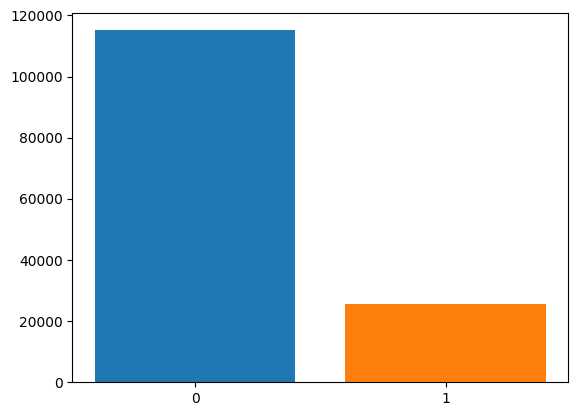

In [132]:
plt.bar('0', Y[Y == 0].count())
plt.bar('1', Y[Y == 1].count());

In [ ]:
unique, counts = np.unique(Y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)


Class Distribution: {0: 115133, 1: 25567}


In [173]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(meta_features.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='tanh'),  
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'precision', 'recall'])

In [151]:
model.fit(meta_features, y_holdout, 
               validation_split=0.2, 
               epochs=100, 
               batch_size=32, 
               verbose=1)

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9205 - loss: 0.3157 - precision: 0.7714 - recall: 0.8304 - val_accuracy: 0.9307 - val_loss: 0.1719 - val_precision: 0.8043 - val_recall: 0.7994
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9302 - loss: 0.1726 - precision: 0.7995 - recall: 0.8234 - val_accuracy: 0.9293 - val_loss: 0.1697 - val_precision: 0.8103 - val_recall: 0.7791
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9304 - loss: 0.1717 - precision: 0.8154 - recall: 0.8186 - val_accuracy: 0.9307 - val_loss: 0.1695 - val_precision: 0.8062 - val_recall: 0.7964
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9286 - loss: 0.1769 - precision: 0.8215 - recall: 0.7947 - val_accuracy: 0.9305 - val_loss: 0.1664 - val_precision: 0.8066 - val_recall: 0.7943
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9282 - loss: 0.1714 - precision: 0.8079 - recall: 0.8004 - val_accuracy: 0.9300 - val_los

In [172]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,277 (40.15 KB)

 Trainable params: 3,425 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,852 (26.77 KB)

In [ ]:
meta_test_preds = (meta_model.predict(test_meta_features) > 0.5).astype(int)

print("Meta-Model Accuracy:", accuracy_score(y_test, meta_test_preds))
print("Meta-Model ROC-AUC:", roc_auc_score(y_test, meta_model.predict(test_meta_features)))

Meta-Model Accuracy: 0.9287491115849325
Meta-Model ROC-AUC: 0.891311367987088


In [156]:
rf_test_preds = rf.predict_proba(testData)[:, 1]  
xgb_test_preds = xgb.predict_proba(testData)[:, 1]  
lgbm_test_preds = lgb.predict_proba(testData)[:, 1]  

metaTestData = np.column_stack((rf_test_preds, xgb_test_preds, lgbm_test_preds))

In [159]:
predictions_Blending = model.predict(metaTestData)

submission_Blending= idextractor[['id']].copy()

submission_Blending['Depression'] = (predictions_Blending > 0.5).astype(int)
submission_Blending.to_csv('SubmissionBlending.csv', index=False)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step


In [149]:
testData.shape

(93800, 133)

In [163]:
X_idk[:,boolfeatures].shape

(140700, 10)

In [168]:
X_blend2, X_meta2, y_blend2, y_meta2 = train_test_split(X_idk[:,boolfeatures], Y, test_size=0.4, random_state=42)
X_holdout2, X_test2, y_holdout2, y_test2 = train_test_split(X_meta2, y_meta2, test_size=0.5, random_state=42)

rf.fit(X_blend2, y_blend2)
xgb.fit(X_blend2, y_blend2)
lgb.fit(X_blend2, y_blend2)

holdoutRF = rf.predict_proba(X_holdout2)[:, 1]
holdoutXGB = xgb.predict_proba(X_holdout2)[:, 1]
holdoutLGB = lgb.predict_proba(X_holdout2)[:, 1]

meta_features2 = np.column_stack((holdoutRF, holdoutXGB, holdoutLGB))

testRF = rf.predict_proba(X_test2)[:, 1]
testXGB = xgb.predict_proba(X_test2)[:, 1]
testLGB = lgb.predict_proba(X_test2)[:, 1]

meta_test2 = np.column_stack((testRF, testXGB, testLGB))

meta_model.fit(meta_features2, y_holdout2)

accuracy_score(y_test2, meta_model.predict(meta_test2))

[LightGBM] [Info] Number of positive: 15221, number of negative: 69199
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 84420, number of used features: 10
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4050 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 7 dense feature groups (0.64 MB) transferred to GPU in 0.001418 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

0.9284292821606255

In [174]:
model.fit(meta_features2, y_holdout2,
          validation_split=0.2, 
               epochs=100, 
               batch_size=32, 
               verbose=1)

Epoch 1/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9144 - loss: 0.2821 - precision: 0.7571 - recall: 0.8213 - val_accuracy: 0.9289 - val_loss: 0.1751 - val_precision: 0.7938 - val_recall: 0.8034
Epoch 2/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9306 - loss: 0.1745 - precision: 0.8040 - recall: 0.8238 - val_accuracy: 0.9287 - val_loss: 0.1725 - val_precision: 0.8039 - val_recall: 0.7852
Epoch 3/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9279 - loss: 0.1764 - precision: 0.8013 - recall: 0.8141 - val_accuracy: 0.9286 - val_loss: 0.1730 - val_precision: 0.7899 - val_recall: 0.8075
Epoch 4/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9306 - loss: 0.1755 - precision: 0.8157 - recall: 0.8129 - val_accuracy: 0.9298 - val_loss: 0.1702 - val_precision: 0.8027 - val_recall: 0.7953
Epoch 5/100
704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9306 - loss: 0.1702 - precision: 0.8112 - recall: 0.8134 - val_accuracy: 0.9286 - val_los

In [176]:
meta_test_preds2 = (model.predict(meta_test2) > 0.5).astype(int)

print("Meta-Model Accuracy:", accuracy_score(y_test2, meta_test_preds2))
print("Meta-Model ROC-AUC:", roc_auc_score(y_test2, model.predict(meta_test2)))

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step
Meta-Model Accuracy: 0.9284292821606255
880/880 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
Meta-Model ROC-AUC: 0.9682553731706801


In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic',tree_method='hist',device= 'cuda', random_state=42)

# Define the parameters grid
param_grid = {
    'max_depth': [3, 6, 10, 15, 30],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200, 300]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, scoring='accuracy', verbose=1)

grid_search.fit(X_train[:,boolfeatures], y_train2)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [1, 3, 6, 10, 15, 30],
                         'n_estimators': [50, 100, 200, 500, 800]},
             scoring='accuracy', verbose=1)

In [184]:
grid_search.best_params_

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 800}

In [185]:
best_model = grid_search.best_estimator_
val_predictions_XGB3 = best_model.predict(X_val3)

accuracy_score(y_val2, val_predictions_XGB3)

0.9137171286425018

In [182]:
predictions_XGB2 = best_model.predict(testData3)

submission_XGB2= idextractor[['id']].copy()

submission_XGB2['Depression'] = predictions_XGB2
submission_XGB2.to_csv('SubmissionXGB2.csv', index=False)